<h1 align="center"> Pobabilistic Graphical Models: pgmpy </h1>

## Qué son los modelos de gráficos probabilísticos (PGMs)?

Los modelos gráficos probabilísticos nos permiten representar distribuciones de probabilidad conjuntas de manera eficiente y también realizar operaciones sobre ellas en menor complejidad de tiempo. En PGM aprovechamos la relación entre las variables aleatorias para obtener una representación compacta.

## Mayor parte de los Modelos Probabilísticos.

* __Bayesian Model__: Los Modelos Bayesianos se utilizan principalmente cuando tenemos una relación causal entre las variables.
* __Markov Model__: Cuando existe una relación no causal entre las variables.

## Bayesian Model

Una red bayesiana consta de un grafo dirigido y una
distribución de probabilidad condicional asociada con cada una de las variables aleatorias. Una red bayesiana se utiliza principalmente cuando existe una relación causal entre variables aleatorias.

Un ejemplo de una red bayesiana que representa a un estudiante que realiza algún curso.


In [1]:
!pip install networkx
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 8.2 MB/s 


Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


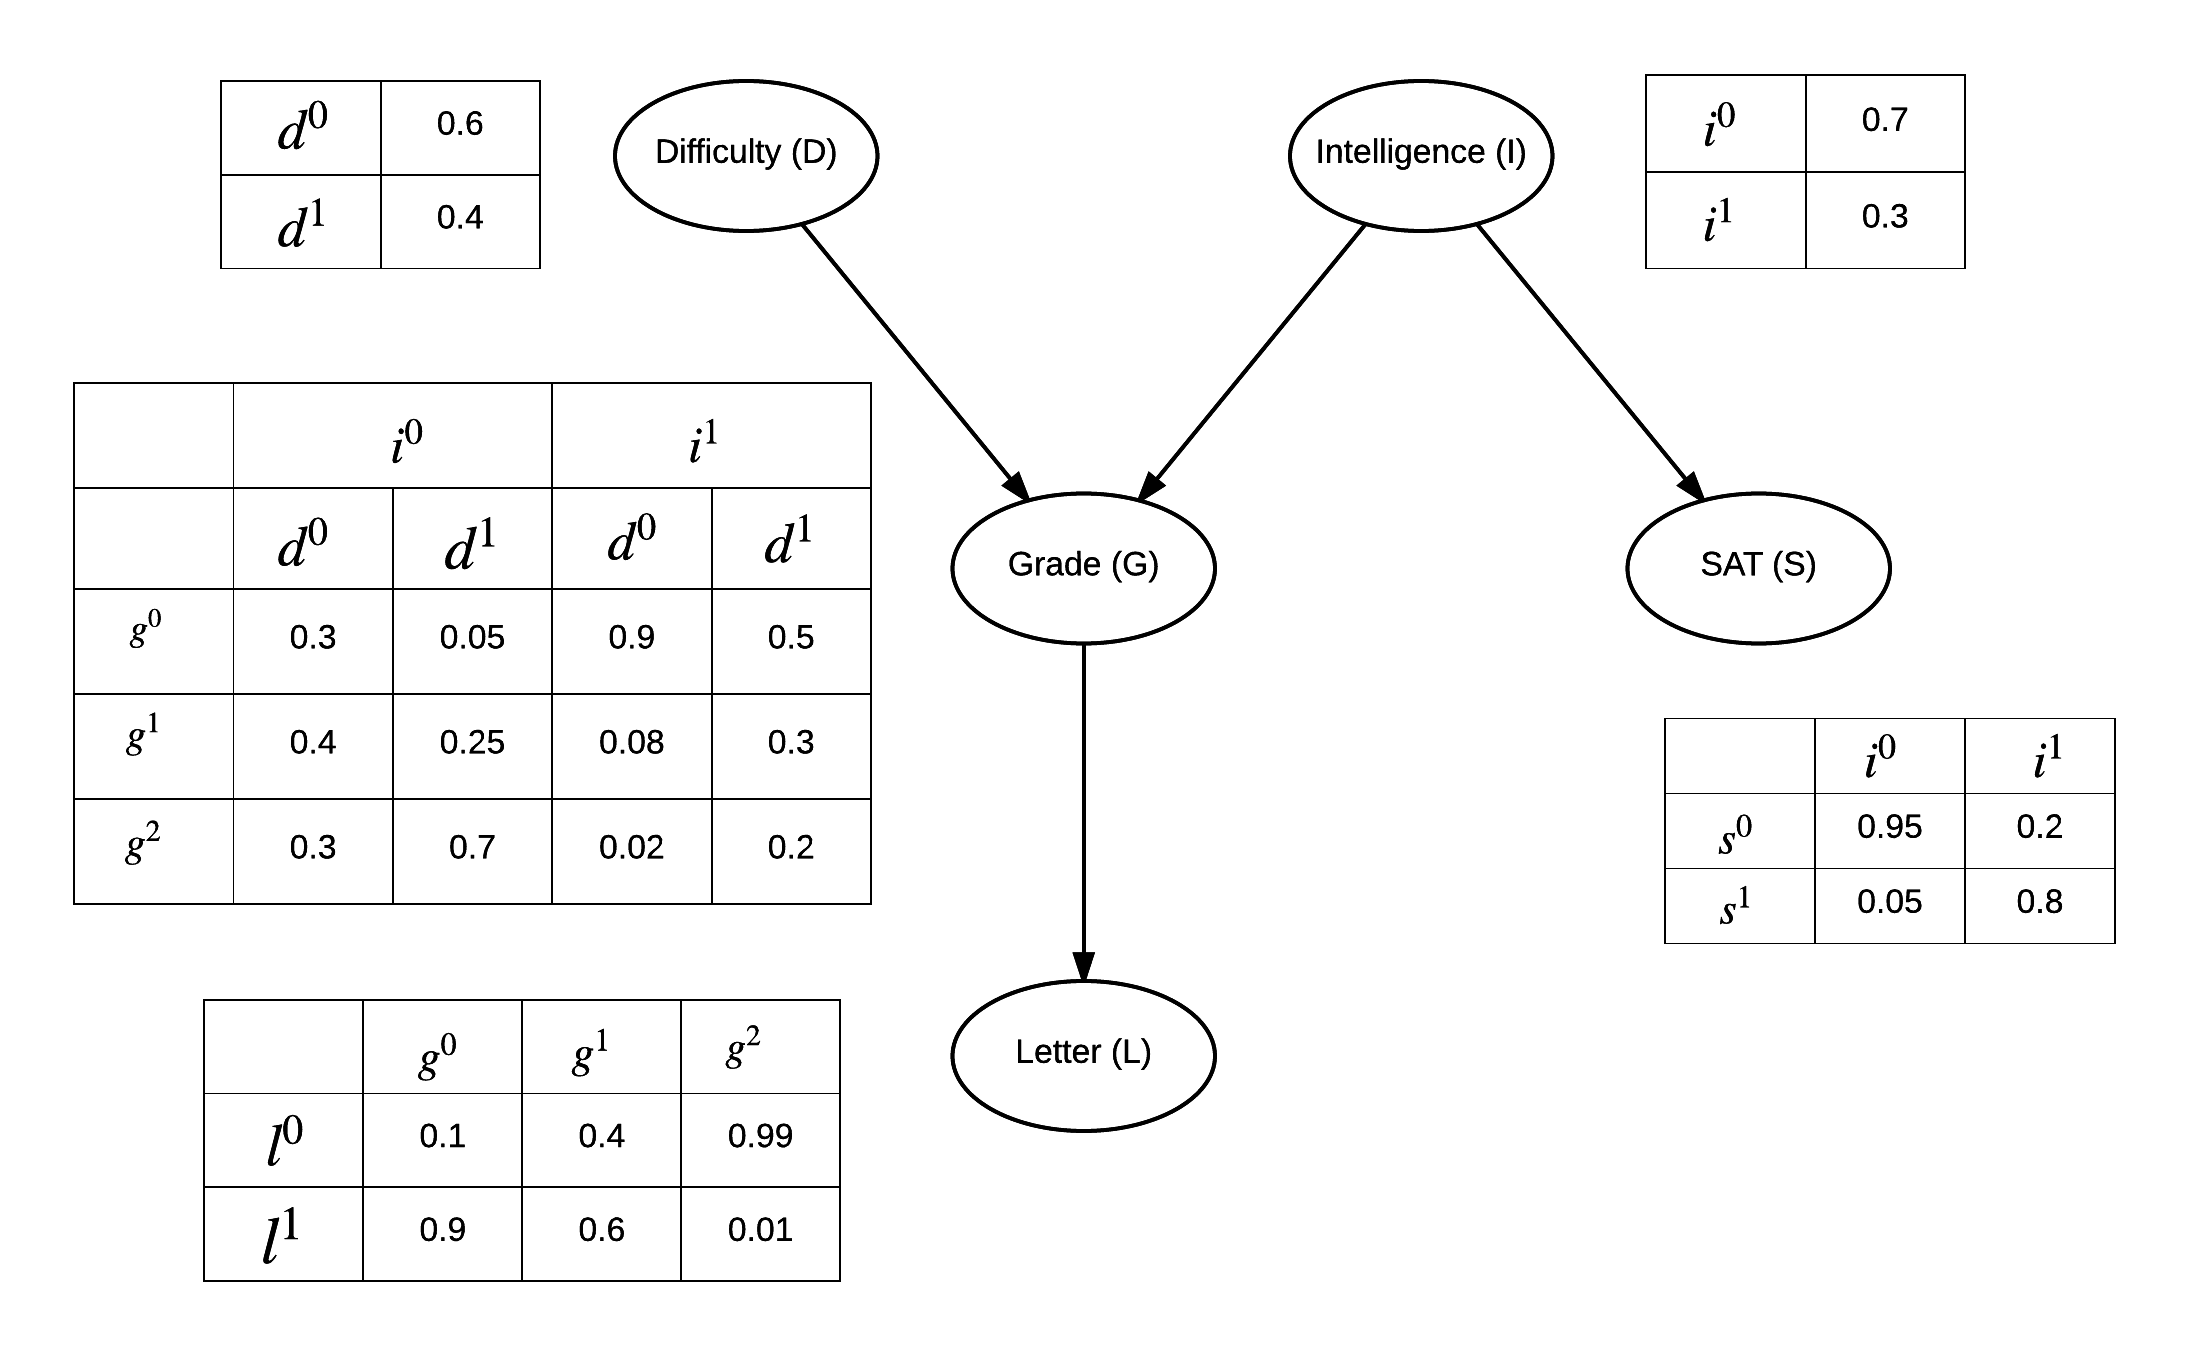

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/BME PGM')

import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator

from pgmpy.models import BayesianModel
import networkx as nx
import pylab as plt

from IPython.display import Image
Image(filename='/content/drive/My Drive/BME/BME_CLASES/DIRECTIVOS/BME PGM/figure1.png')


In [3]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete.CPD import TabularCPD
   
student_model = BayesianModel([('D', 'G'), ('I', 'G'), 
                               ('G', 'L'), ('I', 'S')])

difficulty_cpd = TabularCPD(variable='D', variable_card=2, 
                            values=[[0.6], [0.4]])
intel_cpd = TabularCPD(variable='I', variable_card=2, 
                       values=[[0.7], [0.3]])
grade_cpd = TabularCPD(variable='G', variable_card=3,
                       values=[[0.3, 0.05, 0.9, 0.5],
                               [0.4, 0.25, 0.08, 0.3],
                               [0.3, 0.7, 0.02, 0.2]],
                       evidence=['I', 'D'], evidence_card=[2, 2])

letter_cpd = TabularCPD(variable='L', variable_card=2,
                        values=[[0.1, 0.4, 0.99],
                                [0.9, 0.6, 0.01]],
                        evidence=['G'], evidence_card=[3])
sat_cpd = TabularCPD(variable='S', variable_card=2,
                     values=[[0.95, 0.2],
                             [0.05, 0.8]],
                     evidence=['I'], evidence_card=[2])
   
student_model.add_cpds(grade_cpd, difficulty_cpd, 
                       intel_cpd, letter_cpd, sat_cpd)

# Desarrollo de una Red

La manera más sencilla de diseñar una red bayesiana es mediante el conocimiento experto, es decir, un profesional con el conocimiento del sector decide cuales son las distruibuciones de probabilidad de los datos y construye la estructura del modelo. Ahora, vamos a comprobar estas afirmaciones utilizando el ejemplo de las diapositivas.

Supongamos que tenemos cuatro variables:

- Localización (L)
- Calidad (Q)
- Coste (C)
- Número de personas (N)

Supongamos también que, por experiencia previa tenemos un conocimiento previo más o menos firme de las relaciones existentes entre las variables por lo que decidimos contruir nuestra propia red. 


In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

student_model = BayesianModel([('L', 'N'), ('C', 'N'), 
                               ('L', 'C'), ('Q', 'C')])

loc_cpd = TabularCPD(variable='L', variable_card=2, 
                            values=[[0.6], [0.4]])
cal_cpd = TabularCPD(variable='Q', variable_card=3, 
                       values=[[0.3], [0.5], [0.2]])

cost_cpd = TabularCPD(variable='C', variable_card=2,
                       values=[[0.8, 0.6, 0.1, 0.6, 0.6,0.05],
                               [0.2, 0.4, 0.9, 0.4, 0.4, 0.95]],
                       evidence=['L', 'Q'], evidence_card=[2, 3])

number_cpd = TabularCPD(variable='N', variable_card=2,
                        values=[[0.6, 0.8, 0.1, 0.6],
                                [0.4, 0.2, 0.9, 0.4]],
                        evidence=["L", 'C'], evidence_card=[2,2])
   
student_model.add_cpds(loc_cpd, cal_cpd, 
                       cost_cpd, number_cpd)

Vamos a visualizar ahora el modelo desarrollado por el experto y vamos a analizar las componentes paso a paso.

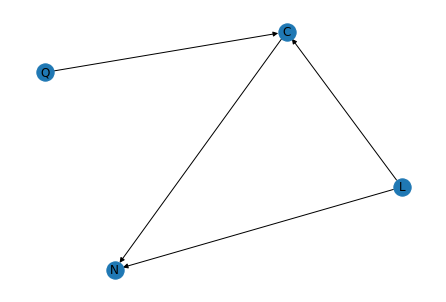

In [ ]:
nx.draw(student_model, with_labels=True)
plt.show()

  Veamos ahora las tablas de distibución de probabilidad conjunta.
  

In [ ]:
c = student_model.get_cpds()
print(c[0])
print(student_model.get_cpds('N'))


+------+-----+
| L(0) | 0.6 |
+------+-----+
| L(1) | 0.4 |
+------+-----+
+------+------+------+------+------+
| L    | L(0) | L(0) | L(1) | L(1) |
+------+------+------+------+------+
| C    | C(0) | C(1) | C(0) | C(1) |
+------+------+------+------+------+
| N(0) | 0.6  | 0.8  | 0.1  | 0.6  |
+------+------+------+------+------+
| N(1) | 0.4  | 0.2  | 0.9  | 0.4  |
+------+------+------+------+------+


Una vez definido el modelo podemos realizar las inferencias sobre este para estudiar los comportamientos y evolución de las probabilidades dadas las evidencias que se presenten.

In [ ]:
student_model.get_cpds()

[<TabularCPD representing P(L:2) at 0x7f32e88affd0>,
 <TabularCPD representing P(Q:3) at 0x7f32e88aff10>,
 <TabularCPD representing P(C:2 | L:2, Q:3) at 0x7f32e88a30d0>,
 <TabularCPD representing P(N:2 | L:2, C:2) at 0x7f32e88a38d0>]

In [ ]:
from pgmpy.inference import VariableElimination
student_infer = VariableElimination(student_model)

q = student_infer.query(variables=['N'], evidence={'L': 0},joint=False)
print(q['N'])

Eliminating: C: 100%|██████████| 2/2 [00:00<00:00, 250.25it/s]

+------+----------+
| N    |   phi(N) |
+======+==========+
| N(0) |   0.6880 |
+------+----------+
| N(1) |   0.3120 |
+------+----------+


# Default of credit card clients

A continuación vamos a tratar un problema de impago en targetas de credito. Este tipo de proble

In [4]:
df = pd.read_csv(
    '/content/drive/MyDrive/BME/BME_CLASES/GAM/PGM/datasets_17473_22922_Churn_Modelling.csv'
).drop(["RowNumber","CustomerId"],axis=1)
df.shape

(10000, 12)

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## NAIVE BAYES MODEL Y APRENDIZAJE DE PARÁMETROS


In [ ]:
from pgmpy.models import NaiveBayes
G = NaiveBayes()
G.add_nodes_from(df.columns)
G.add_edges_from([('Exited',key) for key in list(df.columns)[:-1]])

In [ ]:
G.fit(df)

In [ ]:
print(G.get_cpds('Exited'))

+-----------+--------+
| Exited(0) | 0.7963 |
+-----------+--------+
| Exited(1) | 0.2037 |
+-----------+--------+


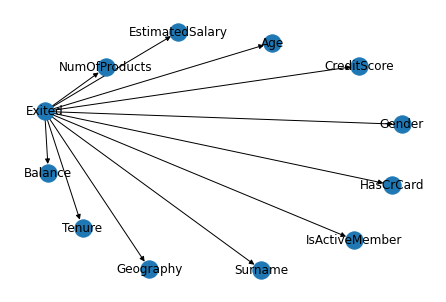

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
data = df.copy()

for i in ["Age","CreditScore","Tenure","Balance",
          "NumOfProducts","EstimatedSalary"]:
  data[i]=pd.cut(data[i],3)

data = data.iloc[:-9000,:].reset_index(drop=True)
datatest = data.iloc[-9000:,:].reset_index(drop=True)
G = NaiveBayes()
G.add_nodes_from(data.columns)
G.add_edges_from([('Exited',key) for key in list(data.columns)[:-1]])
G.fit(data)
pred = G.predict(datatest.drop('Exited',axis=1))
pred["label"] = datatest['Exited'].values

100%|██████████| 1000/1000 [00:22<00:00, 44.06it/s]


In [ ]:
pred.describe()

,Exited,label
count,1000.000000,1000.000000
mean,0.187000,0.204000
std,0.390107,0.403171
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
1-(pred["Exited"]-pred["label"]).abs().sum()/pred.shape[0]

0.957

# Aprendizaje de la estructura

In [ ]:
est = HillClimbSearch(data.iloc[:100], scoring_method=BicScore(data.iloc[:100]))

TypeError: ignored

In [ ]:
best_model = est.estimate()

In [ ]:

nx.draw(best_model, with_labels=True)
plt.show()

In [ ]:
sorted(best_model.nodes())
best_model.edges()

In [ ]:
best_model.edges()
G = BayesianModel()
G.add_nodes_from(sorted(best_model.nodes()))
G.add_edges_from(best_model.edges())
#G.add_edges_from([("EstimatedSalary","Exited"),("CreditScore","Exited")])
G.fit(data.iloc[:100])

In [ ]:
pred = G.predict(datatest.iloc[:100,:].drop('Exited',axis=1))
pred["label"] = datatest.iloc[:100,:]['Exited'].values

In [ ]:
pred["label"] = datatest.iloc[:100,:]['Exited'].values

In [ ]:
nx.draw(G, with_labels=True)


In [ ]:
pred.describe()

,Exited,label
count,100.000000,100.000000
mean,0.200000,0.200000
std,0.402015,0.402015
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
(pred["Exited"]-pred["label"]).abs().sum()/pred.shape[0]

0.0

## SKlearn Naive Bayes


In [ ]:
from sklearn.preprocessing import LabelEncoder
data2 = data.copy()
datatest2=datatest.copy()
lb_make = LabelEncoder()
for i in ["Surname",	"CreditScore",
          "Geography",	"Gender",	"Age",
          "Tenure",	"Balance",	"NumOfProducts","EstimatedSalary"]:
  lb_make.fit(data[i])      
  data2[i]= lb_make.transform(data[i])
  datatest2[i]= lb_make.transform(datatest2[i])


In [ ]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()
clf.fit(data2.drop("Exited",axis=1), data2["Exited"])
pred = clf.predict(datatest2.drop("Exited",axis=1))

In [ ]:
1-(datatest2["Exited"]-pred).abs().sum()/pred.shape[0]

0.897